# Data Wrangling

`Data wrangling`  is the process of `cleaning`, `transforming` and `organizing` data source can be used for `analysis and visualization`. It is an important step in `data analysis` process because `raw data` is often `incomplete`, `inconsistent` and is in an `unstructured format`, which can make it `difficult to work with`. 
- Data wrangling helps us to make data `more consistent`, `accurate` and `useful for analysis and decision making`.

## Steps: 
1. Gathering data
2. Tools to clean data (libraries)
3. How to clean data (steps)
   1. Dealing with missing values
   2. Correcting errors in data
      1. Outliers removal
         1. Visualization
         2. IQR Method
         3. Z-score
   3. Dropping duplicates   
4. Transforming the data 
   1. Normalize the data
      1. Min-Max Normalization/Scaling
      2. Standard Scaling
      3. Winsorization
      4. Z-score Normalization
      5. Decimal Scaling
      6. Log Transformation
5. Feature Engineering
6. Organizing the data 
   1. Columns creation 
   2. Renaming 
7. Saving the wrangled data

## 01- Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## 02- Load dataset

In [2]:
df = sns.load_dataset('titanic')

## 03- Apply EDA steps

In [3]:
df.shape


(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
df.drop(columns='deck', inplace=True)

In [10]:
df["age"] = df.fillna(value=df["age"].mean())

TypeError: Cannot setitem on a Categorical with a new category (29.69911764705882), set the categories first

In [11]:
## Convert Column to Numeric First
# Temporarily treat as non-categorical
df["age"] = df["age"].astype("float")

# Fill NaN and convert back if needed
df["age"] = df["age"].fillna(df["age"].mean())

In [12]:
df.isnull().sum()/len(df) * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

## 04- Outliers Removal

## 4.1- Visualization

<Axes: xlabel='sex', ylabel='age'>

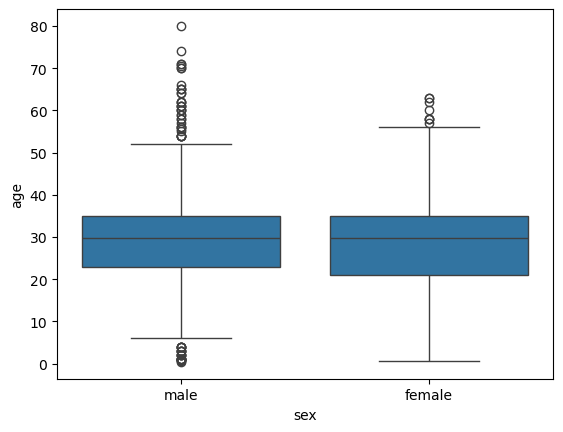

In [13]:
import seaborn as sns
sns.boxplot(x="sex", y='age', data=df)

## 4.2- IQR Method

In [14]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [16]:
df.shape

(825, 14)

<Axes: xlabel='age', ylabel='Count'>

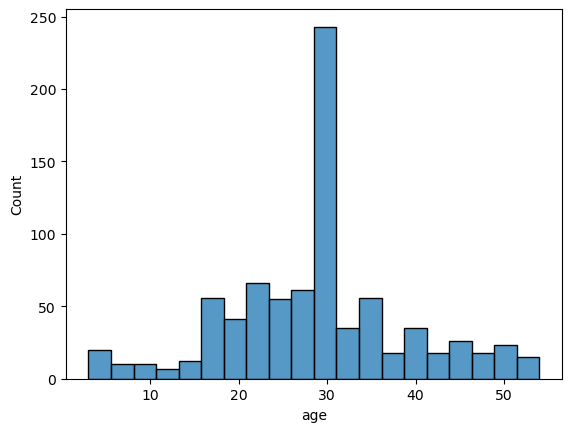

In [17]:
sns.histplot(df['age'])

## 4.3- Z-Score Method

In [18]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
from scipy import stats
import numpy as np

zscore = np.abs(stats.zscore(df['age']))
threshold = 3
df = df[(zscore < threshold)]

## Explanation
- `Z-Score Calculation`: Computes how many standard deviations each age value is from the mean (stats.zscore), then takes absolute values (np.abs)

- `Outlier Removal`: Keeps only rows where age is within ±3 standard deviations (threshold = 3)

- ` Result`: Filters out extreme age values, creating a cleaner dataset (df = df[(zscore < threshold)])

- (`Bonus`: Visualize with df['age'].plot(kind='box') before/after to see the effect!) 🚀


## 05- Finding and dropping duplicates

In [20]:
df.shape

(825, 14)

In [21]:
df.duplicated().sum()

109

In [22]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [23]:
df_duplicates.shape

(109, 14)

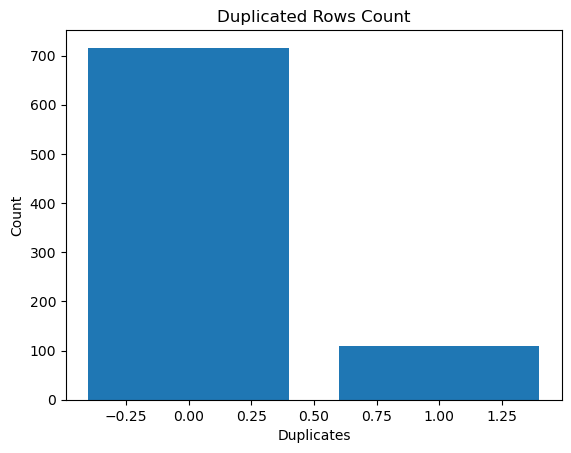

In [24]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.xlabel('Duplicates')
plt.ylabel('Count')
plt.title('Duplicated Rows Count')
plt.show()

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(716, 14)

## 06- Normalizing the data 

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 6.1- Min-Max Normalization

In [28]:
#1 - Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#2 - Load the dataset
df
#3 - Select the columns to normalize
cols_to_normalize = ['age', 'fare']
#4 - Create a scaler function/tool
scaler = MinMaxScaler()
#5 - Fit the scaler to the data
df[cols_to_normalize] = scaler.fit(df[cols_to_normalize])
#6 - Check the data
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,MinMaxScaler(),1,0,MinMaxScaler(),S,Third,man,True,Southampton,no,False
1,1,1,female,MinMaxScaler(),1,0,MinMaxScaler(),C,First,woman,False,Cherbourg,yes,False
2,1,3,female,MinMaxScaler(),0,0,MinMaxScaler(),S,Third,woman,False,Southampton,yes,True
3,1,1,female,MinMaxScaler(),1,0,MinMaxScaler(),S,First,woman,False,Southampton,yes,False
4,0,3,male,MinMaxScaler(),0,0,MinMaxScaler(),S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,MinMaxScaler(),0,5,MinMaxScaler(),Q,Third,woman,False,Queenstown,no,False
887,1,1,female,MinMaxScaler(),0,0,MinMaxScaler(),S,First,woman,False,Southampton,yes,True
888,0,3,female,MinMaxScaler(),1,2,MinMaxScaler(),S,Third,woman,False,Southampton,no,False
889,1,1,male,MinMaxScaler(),0,0,MinMaxScaler(),C,First,man,True,Cherbourg,yes,True


In [29]:
df.describe()

,survived,pclass,sibsp,parch
count,716.000000,716.000000,716.000000,716.000000
mean,0.412011,2.277933,0.509777,0.393855
std,0.492541,0.845962,0.961447,0.833673
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


## 6.2- Standard Scaling 

In [49]:
#1 - Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
#2 - Load the dataset
df
#3 - Select the columns to normalize
cols_to_normalize = ['age', 'fare']
#4 - Create a scaler function/tool
scaler = StandardScaler()
#5 - Fit the scaler to the data
df[cols_to_normalize] = scaler.fit(df[cols_to_normalize])
#6 - Check the data
df


TypeError: float() argument must be a string or a real number, not 'MinMaxScaler'

In [50]:
df.describe()

,survival,pclass,sibsp,parch,family_size
count,716.000000,716.000000,716.000000,716.000000,716.000000
mean,0.412011,2.277933,0.509777,0.393855,1.903631
std,0.492541,0.845962,0.961447,0.833673,1.487642
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,8.000000,6.000000,11.000000


### Standardization

x_stand = (x-mean(X))/ std(x)


## 6.3- Log Transformation

In [38]:
ship = sns.load_dataset('titanic')
ship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
ship.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
import numpy as np

ship ["age"] = ship ["age"].fillna(ship ["age"].median())
ship["fare"] = ship["fare"].fillna(ship["fare"].median())

#log transformation
ship["fare"] = np.log(ship["fare"])
ship["age"] = np.log(ship["age"])

c:\Users\Yawar Ali\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
ship.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

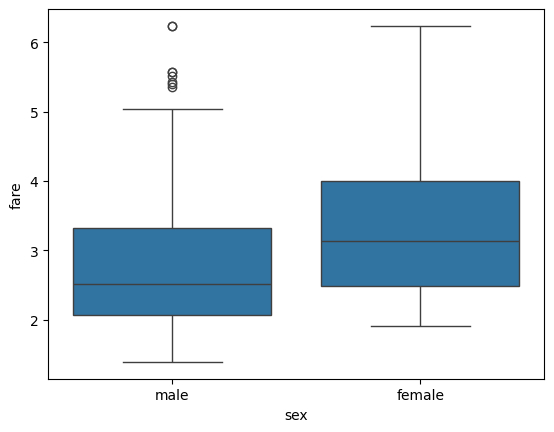

In [43]:
sns.boxplot(x="sex", y="fare", data=ship)

<Axes: xlabel='age', ylabel='Count'>

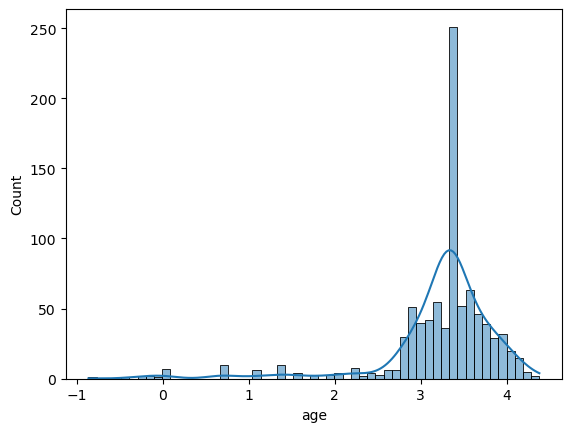

In [51]:
sns.histplot(ship['age'], kde=True)

## 07- Organizing the data 

In [33]:
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["family_size"].head(5)

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64

c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


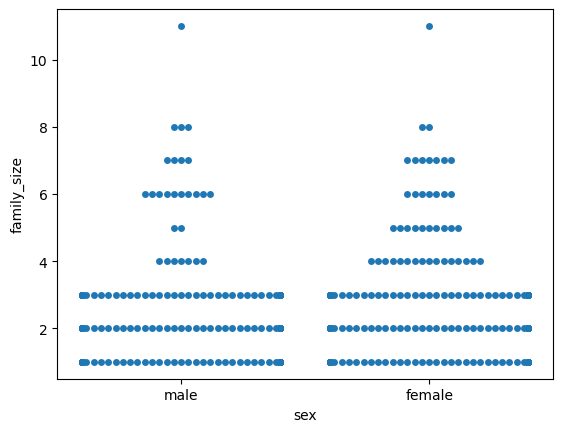

In [34]:
sns.swarmplot(data=df, x="sex", y="family_size")    

c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Yawar Ali\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


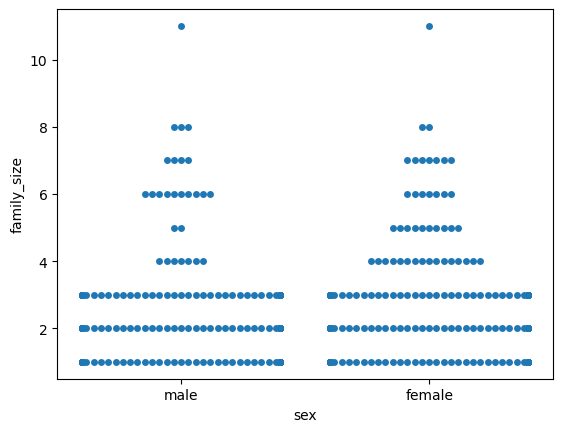

In [35]:
sns.swarmplot(data=df, x="sex", y="family_size")

In [44]:
df = df.rename(columns={"survived": "survival"})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [53]:
table = pd.pivot_table(ship, values="fare", index="pclass", 
    columns= "survived", aggfunc=np.sum)
table

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_6048\220359796.py:1: FutureWarning: The provided callable <function sum at 0x00000268BB9F8A40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(ship, values="fare", index="pclass",


survived,0,1
pclass,,
1,-inf,584.350781
2,-inf,260.065332
3,-inf,-inf


TypeError: Invalid object type at position 0

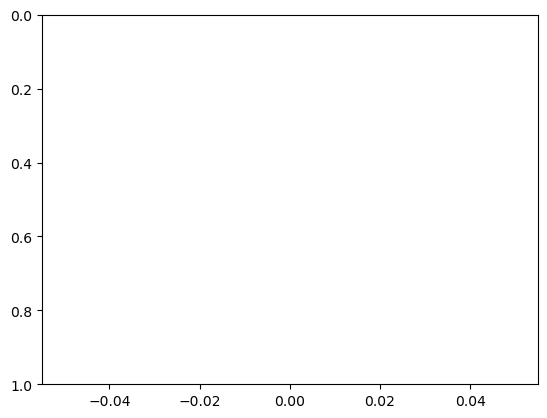

In [55]:
sns.scatterplot(data=df, x="fare", y="age")

## 08- Save the Data

In [56]:
df.to_csv("titanic_cleaned.csv", index=False)

---
